## Iris Dataset - Classifying Flowers

### A study of univariate and bivariate analysis between features of flowers
You may think that this project primarily focusses on classifying flower data based on its features. However, in this project, it is less focussed on that. We are going to do exploration and data analysis, within features themselves. Particularly, bivariate analysis. 

In this bivariate analysis, we are using what we have learnt in secondary school, $y = mx + c$, to estimate y values from x values. Here, the y values refer to the dependent variable, or any variable we want. And x values are independent variable. We choose y = petal length, and x = petal width.

This project covers the following concepts:
- Linear regression with a step-by-step implementation
- Polynomial regression
- Logistic regression and its implementation
- Softmax regression

### Importing requirements

In [1]:
import numpy as np
from sklearn import datasets
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
sns.set(style='whitegrid', context='notebook')

### Loading the Iris Dataset

In [3]:
iris2 = sns.load_dataset('iris')

In [4]:
iris2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


It is time to start with the simplest, but still useful abstraction for our data - a linear regression function. In linear regression, we try to find a linear equation that minimises the distance between the data points and the modeled line. The model function takes the following form:

$$y_{i} = \beta x_{i} + \alpha + \epsilon_{i}$$

where:
- $\alpha$ is the intercept,
- $\beta$ is the slope of the modeled line
- $x$ is the independent variable
- $y$ is the dependent variable
- $\epsilon_{i}$ variable is an interesting one. It is the error distance from the sample $i$, to the regressed line.

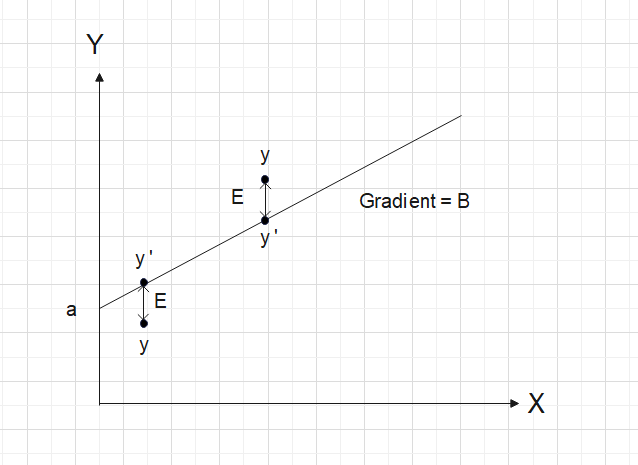

The set of all those distances, calculated in the cost function, will give us the values of the unknown parameters that will minimise the cost. 

### Determination of the cost function
We are using method of least squares.

$$ J(\beta_{0}, \beta_{1}) = \sum \limits_{i = 0}^{n} (y_{i} - \beta_{0} - \beta_{1} x_{i}) ^{2}$$

Least squares function for a linear equation, using the standard variables $\beta_{0}$ and $\beta_{1}$, which are used in the next sections.

Returns the total differences between all the values ($y_{i}$) and the corresponding point in our regressing line $(\beta_{0} + \beta_{1}x_{i})$

## Multiple ways of minimising errors

The least squares error function has several ways of getting a solution:

- The analytical way
- Using the covariance and correlation values
- Using gradient descent

### Analytical approach

Using linear algebra techniques, we first represent the error in a function in a matrix form:

$$ J(\theta) = \frac{1}{2m} (X \theta  - y)^{T} (X\theta - y)$$

$J$ is the cost function and has an analytical solution of:

$$ \theta = (X^{T} X^{-1}) X^{T} y$$

### Pros and cons of analytical approach

Approach using linear algebra to calculate the minimum error solution is easier. But there are some possible problems with this approach:

- First, matrix multiplication and inversion are computationally expensive. Time complexity is $O(n^{2})$ to $O(n^{3})$.
- Additionally, and depending on the implementation, this direct approach could have limited accuracy. 

## Covariance/correlation method

Now, it is time to introduce a new way of estimating the coefficient of our regressing line. In the process, we learn other statistical measures, like covariance and correlation. This will also help us when analysing a dataset for the first time and drawing our first conclusions.




### Covariance

Covariance is a statistical term, and can be defined as:
- A measure of the systematic relationship betwewen a pair of random variables, wherein, a change in one variable is reciprocated by an equivalent change in another variable.

Covariance can takae any value between $-\infty$ to $\infty$, wherein, a negative value is an indicator of a negative relationship. Whereas, a positive value represents a positive relationship. It also ascertains a linear relationship between the two variables.

Therefore, when the value is 0, it indicates no direct linear relationship, and the values tend to form a blob-like distribution.

$$cov(x_{i}, y) = \frac{1}{n-1} \sum (x - \bar{x}) (y - \bar{y})$$

where: 
- $cov$ is the covariance,
- $n-1$ is the degrees of freedom.

### Standardisation (scaling method for x values)

Center the variable by subtracting the mean and scaling it with the standard deviation of the dataset.

$$z = \frac{x_{i} - \mu}{\sigma}$$

In [5]:
def covariance(X, Y):
    xbar = np.mean(X)
    ybar = np.mean(Y)
    epsilion = 0
    for x, y in zip(X, Y):
        epsilion = epsilion + (x-xbar) * (y-ybar)
    return epsilion / (len(X) - 1)

In [6]:
print("Result of pre-defined covariance function, cov =", covariance([1,3,4], [1,0,2]))
print("Result of numpy covariance function, cov matrix =", np.cov([1,3,4], [1,0,2]))

Result of pre-defined covariance function, cov = 0.5
Result of numpy covariance function, cov matrix = [[2.33333333 0.5       ]
 [0.5        1.        ]]


The result should be equal to (1,0) and (0,1) of the matrix. In this case, 0.5.

### Correlation
This will be the starting point of our analysis, and we will be extending it towards each axis, with the correlation value.

The correlation value determines the degree to which two or more random variables move in tandem. During the study of two variables, if it has been observed that the movement of one variable is concordant, with an equivalent movement in another variable, then, the variables are said to be correlated. 

The formula is:

$$r = \frac{1}{n-1} * \frac{\sum(x_{i} - \bar{x}_{i}) (y - \bar{y})} {\sigma_{x_{i}} \sigma_{y}}$$

When $r$ is a positive value, the more $r$ approaches 1, the more it is directly correlated. Meaning, two variables move in the same direction.
When $r$ is a negative value, the more $r$ approaches -1, the more the two variables are in opposite directions. Hence the domain of $r$ is $-1 \leq r \leq +1$.

Let's break down why the denominator, $\sigma_{x_{i}} \sigma_{y_{i}}$, can be considered a measure of variance:

- Standard deviation measures the spread of data.
- Variance, $\sigma^{2}$, is the square of standard deviation, and quantifies the average of the squared differences from the mean. 
- Product of variances quantifies the "joint variability" of the two variables It tells us how much X and Y vary together.

In [7]:
def correlation(X, Y):
    return (covariance(X, Y) / (np.std(X, ddof=1) * np.std(Y, ddof=1)))

### Searching for the slope and intercept with covariance and correlation
To approximate a linear equation it is:

$$ \hat{y} = \hat{\beta} x + \hat{\alpha}$$

As we know that this line passes through the average of all the points, we can estimate the intercept, with the only unknown being the estimated slope. It is nothing fancier than just flipping the equation around to get intercept.

$$ \hat{\alpha} = \bar{y} - \hat{\beta} \bar{x}$$

As slope represents the change of the dependent variable divided by the change in the independent variable. But in this case we are dealing with the variation of the data, rather than absolute differences between coordinates.

Slope: a proportion of the variance in the independent variable that covaries with the dependent variable:

$$ \hat{\beta} = \frac{Cov(x, y)} {Var(x)} $$

As it happens, if our data actually looks like a circular cloud when we plot it, our slope will become zero. This suggests no relationship between both variables.

$$ \hat{\beta} = \frac{\sum\limits^{n}_{i=1} (x_{i} - \bar{x}) (y_{i} - \bar{y})} {\sum\limits^{n}_{i=1} (x-\bar{x})^{2}}$$

$$ = r_{xy} \frac{S_{y}}{S_{x}}$$



In [8]:
print("Result of pre-defined corr function, r =", correlation([1,1,4,3], [1,0,2,2]))
print("Result of numpy corr function =", np.corrcoef([1,1,4,3], [1,0,2,2]))

Result of pre-defined corr function, r = 0.8703882797784892
Result of numpy corr function = [[1.         0.87038828]
 [0.87038828 1.        ]]


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.02, 'Summary of Variable Pairs, and Univariate Distributions')

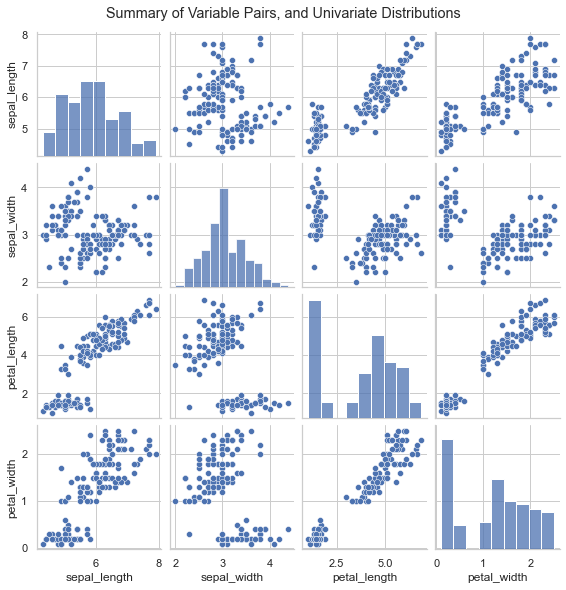

In [9]:
pairplot = sns.pairplot(iris2, size=2.0)
pairplot.fig.suptitle('Summary of Variable Pairs, and Univariate Distributions',
                      y=1.02)

Let's select two variables that, from our initial analysis, have the property of being linearly dependent. They are "petal width" and "petal length".

In [10]:
X = iris2['petal_width']
Y = iris2['petal_length']

Text(0.5, 1.0, 'Distribution of petal length against petal width')

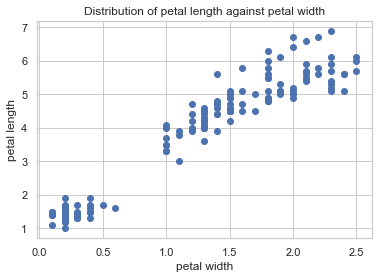

In [11]:
plt.scatter(X, Y)
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.title('Distribution of petal length against petal width')

### Creating the prediction function

First, let's define the function that will represent the modeled data. This is in the form of linear function, in the form y = beta * x + alpha.

In [12]:
def predict(alpha, beta, x_i):
    return beta * x_i + alpha

### Defining the error function

This shows us the difference between predictions and the expected output during training. As we will explain in depth in the next chapter, we have two main alternatives:

- measuring the absolute difference between values (or L1)
- or measuring a variant of the square of the difference (or L2).

Let's define both versions, including the first formulation inside the second.

In [13]:
def error(alpha, beta, x_i, y_i): #L1
    return y_i - predict(alpha, beta, x_i)

In [14]:
def sum_sq_e(alpha, beta, x, y):
    total_error = sum((error(alpha, beta, x_i, y_i) ** 2) 
                      for x_i, y_i in zip(x, y))
    
    return total_error

### Correlation fit

Now, we will define a function implementing the correlation method, to find the parameters for our regression:

In [15]:
def correlation_fit(x, y):
    beta = correlation(x, y) * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    
    return alpha, beta

In [16]:
alpha, beta = correlation_fit(X, Y)
print("Alpha =", alpha)
print("Beta =", beta)

Alpha = 1.0835580328505143
Beta = 2.229940495121862


Let's now graph the regressed line, with the data, in order to intuitively show the appropriateness of the solution:

Text(0.5, 1.0, 'Best fit line of petal length against petal width')

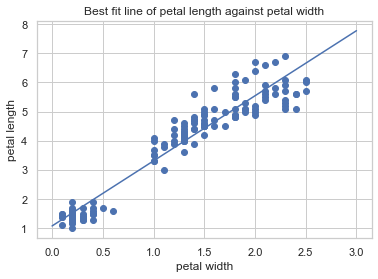

In [17]:
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr * beta) + alpha)

plt.xlabel('petal width')
plt.ylabel('petal length')
plt.title('Best fit line of petal length against petal width')

In [18]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [19]:
ix = iris2['petal_width']
iy = iris2['petal_length']

x_plot = np.linspace(0, 2.6, 100)

X = ix.values[:, np.newaxis]

X_plot = x_plot[:, np.newaxis]

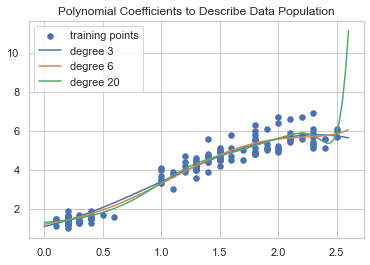

In [22]:
plt.scatter(ix, iy, s=30, marker='o', label='training points')
for count, degree in enumerate([3, 6, 20]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(solver='svd'))
    model.fit(X, iy)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label='degree %d' % degree)
    
plt.legend(loc='upper left')
plt.title('Polynomial Coefficients to Describe Data Population')
plt.show()

## Using gradient descent

- Linear function variables, $\beta_{0}$ and $\beta_{1}$
- The number of samples in the sampleset, $m$
- The different elements in the sampleset, $x^{(i)}$ and $y^{(i)}$


Let's start with the error function, $J$. It was defined in previous sections (least squares function). We add $\frac{1}{2m}$ at the start of the equation.

$$J(\beta_{0}, \beta_{1}) = \frac{1}{2m} \sum \limits^{m}_{i=1} ((\beta_{0} + \beta_{1} x^{(i)}) - y^{(i)}) ^{2}$$

In [23]:
def least_squares(b0, b1, points):
    totalError = 0
    N = float(len(points))
    for x, y in points:
        totalError += (y - (b1 * x + b0)) ** 2
        
    return totalError / 2.*N

### Using partial derivatives

We introduce a new operator, the gradient. 
Assuming we know how partial derivatives work, it is enough to say that the gradient is a vector containing the mentioned derivatives. 

$$\triangledown J(\beta_{0}, \beta_{1}) = \begin{bmatrix} (\frac{\delta J}{\delta \beta_{0}}) \\ (\frac{\delta J}{\delta \beta_{1}}) \end{bmatrix} $$

This gives us the direction of change of the whole function, at a single point.

Here is the partial derivative of the error function for $\beta_{1}$

$$ \frac{\delta J} {\delta \beta_{0}} = \frac{1}{m} \sum ^{m} _{i=1} ((\beta_{0} + \beta_{1} x^{(i)}) - y^{(i)}) = \frac{1}{m} \sum ^{m} _{i=1} (h_{a} (x^{(i)}) - y^{(i)}) $$

$$ \frac{\delta J} {\delta \beta_{1}} = \frac{1}{m} \sum ^{m} _{i=1} ((\beta_{0} + \beta_{1} x^{(i)}) - y^{(i)}) x^{(i)} = \frac{1}{m} \sum ^{m} _{i=1} (h_{a} (x^{(i)}) - y^{(i)}) x^{(i)}$$

In [24]:
def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))
    for x, y in points:
        b0_gradient += (1/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += (1/N) * x * (y - ((b1_current * x) + b0_current))
    
    new_b0 = b0_current + (learningRate * b0_gradient)
    new_b1 = b1_current + (learningRate * b1_gradient)
    
    return [new_b0, new_b1, least_squares(new_b0, new_b1, points)]

### Recursion equations for model functions

$$(\beta_{0})_{k+1} \leftarrow (\beta_{0})_{k} - \alpha \frac{1}{m} \sum ^{m} _{i=1} (h_{a} (x^{(i)}) - y^{(i)})$$

$$(\beta_{1})_{k+1} \leftarrow (\beta_{1})_{k} - \alpha \frac{1}{m} \sum ^{m} _{i=1} (h_{a} (x^{(i)}) - y^{(i)}) x^{(i)}$$

### Expression of $\beta$, and gradient descent

$$ \beta = \begin{bmatrix} \beta_{0} \\ \beta_{1} \end{bmatrix} $$

With this new expression, our recursion steps are expressed in this simple expression:

$$ \beta_{k+1} \leftarrow \beta_{k} - \alpha \triangledown J(\beta_{k}) $$

We now define a function that completes training outside the model. It initialises the parameters and will repeat gradient step a fixed number of times.

In [25]:
def run_gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    slope = []
    intersect = []
    error = []
    
    for i in range(num_iterations):
        b0, b1, e = step_gradient(b0, b1, np.array(points), learning_rate)
        slope.append(b1)
        intersect.append(b0)
        error.append(e)
        
    return [b0, b1, e, slope, intersect, error]

In [26]:
X = iris2['petal_width'].tolist()
Y = iris2['petal_length'].tolist()

points = np.dstack((X, Y))[0]

### Testing hyperparameter values, $\alpha$

We first test $\alpha$ = 0.0001, a reasonable starting point.

In [27]:
learning_rate = 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)

Text(0.5, 0, 'Petal width')

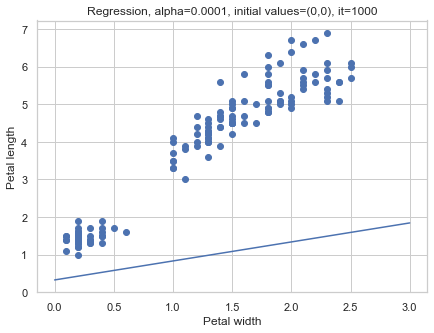

In [28]:
plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*b1) + b0)
plt.title('Regression, alpha=0.0001, initial values=(0,0), it=1000')

plt.ylabel('Petal length')
plt.xlabel('Petal width')

Well, that is poor performance. Let's see what happened with the error during training:

Text(0.5, 0, 'Number of iterations')

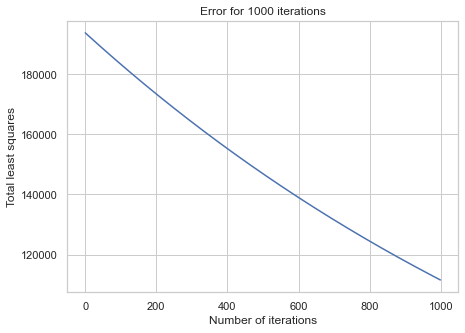

In [29]:
plt.figure(figsize=(7,5))
xr = np.arange(0, 1000)

plt.plot(xr, np.array(error).transpose())
plt.title('Error for 1000 iterations')
plt.ylabel('Total least squares')
plt.xlabel('Number of iterations')

Text(0.5, 1.0, 'Error for 1000 iterations, increased step by tenfold')

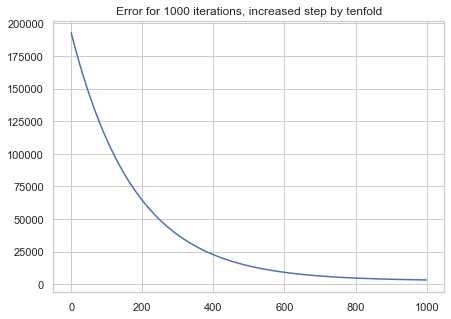

In [30]:
learning_rate = 0.001 #Last one was 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000

[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, 
                                                            initial_b0,
                                                            initial_b1,
                                                            learning_rate,
                                                            num_iterations
                                                           )

plt.figure(figsize=(7,5))
xr = np.arange(0, 1000)
plt.plot(xr, np.array(error).transpose())
plt.title('Error for 1000 iterations, increased step by tenfold')

Text(0.5, 0, 'Petal width')

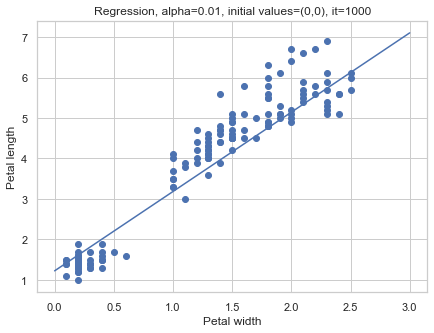

In [31]:
plt.figure(figsize=(7,5))
plt.scatter(X, Y)
xr = np.arange(0, 3.5)

plt.plot(xr, (xr * b1) + b0)
plt.title('Regression, alpha=0.01, initial values=(0,0), it=1000')
plt.ylabel('Petal length')
plt.xlabel('Petal width')

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

alpha_values = np.arange(0.0001, 0.85, 0.05)
param_distributions = {}
points = points.reshape(-1, 1)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=LinearRegression(), 
                                   param_distributions=param_distributions, 
                                   n_iter=100)

# Fit the model to the training data
random_search.fit(points[:, 0], points[:, 1])

# Get the best alpha value
best_alpha = random_search.best_estimator_.alpha

# Plot the results of all alpha values in a graph
plt.figure(figsize=(7, 5))
error_by_alpha = []
for alpha in alpha_values:
    b0, b1, error = run_gradient_descent(points, initial_b0, initial_b1, alpha, 1000)
    error_by_alpha.append(error[-1])

plt.plot(alpha_values, error_by_alpha)
plt.title('Error for different alpha values')
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

Text(0.5, 1.0, 'Error for 1000 iterations, big step')

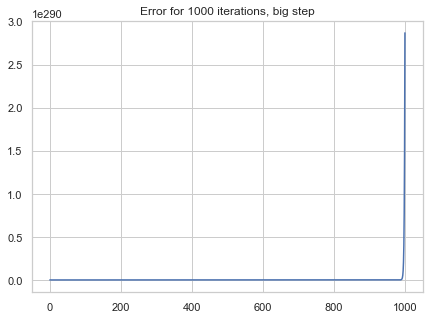

In [32]:
learning_rate = 0.85 # Last one was 0.0001
initial_b0 = 0
initial_b1 = 0
num_iterations = 1000

[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, 
                                                            initial_b0, 
                                                            initial_b1, 
                                                            learning_rate,
                                                            num_iterations)

plt.figure(figsize=(7,5))
xr = np.arange(0, 1000)
plt.plot(xr, np.array(error).transpose())
plt.title('Error for 1000 iterations, big step')

This is a bad move. As you can see, the error went to infinity. What happened here?

The steps we are taking are so radical that instead of slicing the imaginary bowl we described, we are just jumping around the surface. As the iterations advance, we began to escalate the accumulated errors without control. 

Another measure that could be taken, is to improve our seed values. The seed value starts from 0. Thisis a very bad idea in general for this technique, especially when you are working with data that is not normalised. There are more reasons to this. So, let's try to initialise the parameter on a pseudo-random location in order to allow the graphics to be the same across the code examples, and see what happens:

Text(0.5, 1.0, 'Error for 1000 iterations, step 0.001, random initial parameter values')

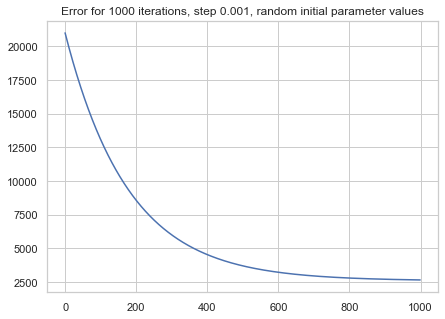

In [33]:
learning_rate = 0.001 # Last one was 0.0001
initial_b0 = 0.8 # Random
initial_b1 = 1.5 # Random
num_iterations = 1000

[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, 
                                                            initial_b0, 
                                                            initial_b1, 
                                                            learning_rate,
                                                            num_iterations)

plt.figure(figsize=(7,5))
xr = np.arange(0, 1000)
plt.plot(xr, np.array(error).transpose())
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values')

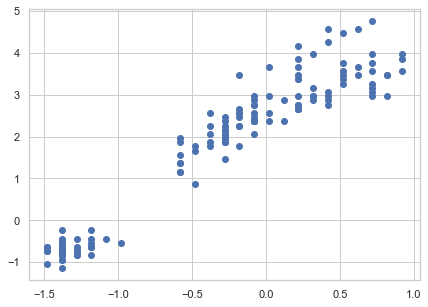

In [34]:
learning_rate = 0.001 # Last one was 0.0001
initial_b0 = 0.8 # Random
initial_b1 = 1.5 # Random
num_iterations = 1000

x_mean = np.mean(points[:, 0])
y_mean = np.mean(points[:, 1])
x_std = np.std(points[:, 0])
y_std = np.std(points[:, 1])

X_normalised = (points[:,0] - x_mean / x_std)
Y_normalised = (points[:,1] - y_mean / y_std)

plt.figure(figsize=(7,5))
plt.scatter(X_normalised, Y_normalised)

Text(0.5, 1.0, 'Error for 1000 iterations, step 0.001, random initial parameter values, normalised initial values')

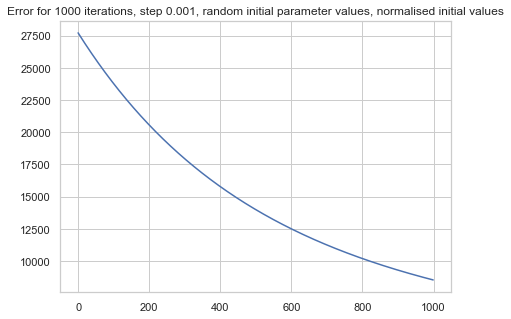

In [35]:
points = np.dstack((X_normalised, Y_normalised))[0]
learning_rate = 0.001
initial_b0 = 0.8
initial_b1 = 1.5
num_iterations = 1000

[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, 
                                                            initial_b0, 
                                                            initial_b1, 
                                                            learning_rate,
                                                            num_iterations)

plt.figure(figsize=(7,5))
xr = np.arange(0, 1000)
plt.plot(xr, np.array(error).transpose())
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalised initial values')